# Intermediate Data Visualiation with Seaborn

Visualising distributions is a fundamental component of exploratory data analysis (EDA). Python offers several robust, flexible libraries for this purpose - **matplotlib**, **pandas**, and **seaborn** - each with its strengths, API styles, and advanced features. Understanding how to harness each, especially using the object-oriented (OOP) interface, is vital for producing publication-quality, insightful visualisations.

### 1. Matplotlib: The Foundation

**Matplotlib** is the core plotting library in Python. Most other libraries, including seaborn, are built on top of it. Mastering matplotlib (especially its object-oriented interface) is crucial for creating highly customised, reproducible graphics.

#### Basic Histogram (OOP Interface)

```python
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wines.csv")

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['alcohol'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title("Alcohol Content Distribution")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
```

**Key Notes:**
- Use `fig, ax = plt.subplots()` for the OOP interface, enabling more advanced layouts and customisation.
- Adjust `bins`, `color`, `alpha`, and `edgecolor` for visual clarity.
- Always label axes and titles for interpretability.

### 2. Pandas: Quick and Convenient Plotting

**Pandas** builds on matplotlib, exposing direct plotting methods from DataFrame and Series objects. This is ideal for quick, simple EDA, though less flexible than raw matplotlib.

#### Histogram with Pandas

```python
import pandas as pd

df = pd.read_csv("wines.csv")

ax = df['alcohol'].plot.hist(
    bins=30, color='orchid', edgecolor='black', alpha=0.8, figsize=(8, 5)
)
ax.set_title("Alcohol Content Distribution (Pandas)")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
```

**Notes:**
- Pandas uses the matplotlib backend, so you can still use the OOP interface to further tweak the resulting `ax`.
- For complex visualisations, migrate to matplotlib or seaborn.

### 3. Seaborn: Statistical Visualisation with Ease

**Seaborn** is a statistical plotting library built atop matplotlib, designed for quick, high-level, and visually appealing plots. It is tightly integrated with pandas DataFrames.

#### Histogram with Seaborn's `histplot`

##### API (Functional) Interface

```python
import seaborn as sns
import pandas as pd

df = pd.read_csv("wines.csv")

sns.histplot(df['alcohol'], bins=30, color='mediumseagreen', kde=False)
plt.title("Alcohol Content Histogram (Seaborn histplot)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
```

##### OOP (FacetGrid) Interface

```python
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("wines.csv")

g = sns.displot(df['alcohol'], bins=30, color='deepskyblue', height=5, aspect=1.6)
g.set_axis_labels("Alcohol (%)", "Frequency")
g.fig.suptitle("Alcohol Content Histogram (Seaborn displot)", y=1.03)
plt.tight_layout()
plt.show()
```

#### Kernel Density Estimate (KDE) with Seaborn

Seaborn's `displot` supports multiple kinds of distribution plots, including KDE.

```python
g = sns.displot(df['alcohol'], kind='kde', fill=True, height=5, aspect=1.6)
g.set_axis_labels("Alcohol (%)", "Density")
g.fig.suptitle("Alcohol Content Density (KDE, Seaborn displot)", y=1.03)
plt.tight_layout()
plt.show()
```

### 4. Comparing Histogram APIs: Pandas vs. Seaborn

#### Pandas `.plot.hist()`:

- Plots actual frequency.
- No bar outlines or advanced styling by default.
- Wide bins unless specified.
- Fast, but limited customisation.

#### Seaborn `histplot` / `displot`:

- Automatic axis labelling and attractive styling.
- Muted, modern color palettes by default.
- More precise control over plot appearance, supports multiple plot types.
- OOP `FacetGrid` interface enables easy faceting, labelling, and layout control.

### Best Practices 

- Prefer the OOP interface (`fig, ax = plt.subplots()`, or `FacetGrid` in seaborn) for maximum control and composability.
- Always set axis labels and titles.
- Use `plt.tight_layout()` to avoid overlapping elements.
- Explore additional parameters: `bins`, `hue`, `palette`, `alpha`, `edgecolor`, `height`, `aspect` for tailored, professional plots.
- For exploratory work, pandas is quick; for publication-quality or advanced analysis, migrate to seaborn or raw matplotlib.


Python's data visualisation ecosystem offers layered options—**matplotlib** for full control, **pandas** for speed and simplicity, and **seaborn** for statistical sophistication and aesthetics. Master all three, especially the OOP approach, to produce visually compelling and highly informative distribution plots for your data science projects.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import requests
import os

In [3]:
wine = pd.read_csv("https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Reading a csv file
This is data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

In [4]:
school = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/205443d734f177d36dad2f0bdf821a57b2c4cc13/schoolimprovement2010grants.csv")
school.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


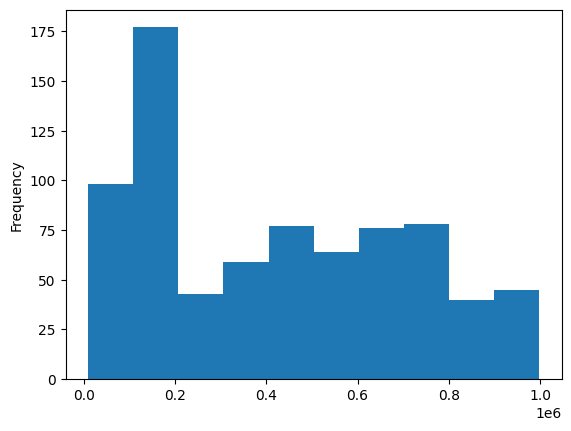

In [8]:
# Use the pandas' plot.hist() function to plot a histogram of the Award_Amount column.
school["Award_Amount"].plot.hist()
plt.show()

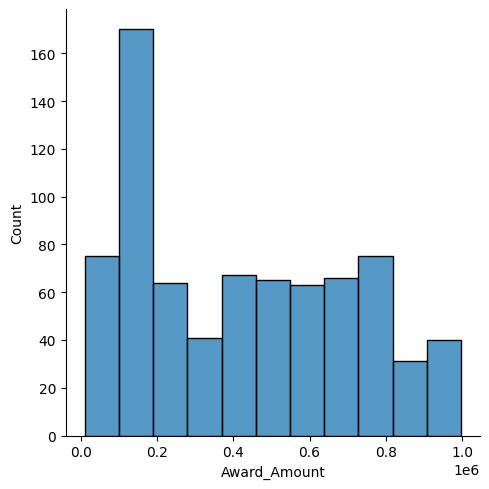

In [9]:
# Use Seaborn's displot() function to plot a distribution plot of the same column.
sns.displot(school["Award_Amount"])
plt.show()

## Using the Distribution Plot: `displot` in Seaborn


Understanding the shape and characteristics of your data’s distribution is foundational in exploratory data analysis (EDA). **Seaborn’s `displot` function** provides a high-level, flexible, and Pythonic interface for visualising distributions in multiple ways—histograms, KDEs, rug plots, and ECDFs—enabling comprehensive, publication-quality insights with minimal code.


### The Power of `displot`

#### What is `displot`?

- `displot` is a figure-level function in Seaborn for visualising univariate and bivariate distributions.
- It leverages several underlying Seaborn functions (`histplot`, `kdeplot`, `rugplot`, `ecdfplot`) and returns a `FacetGrid` object for advanced customisation.
- Supports both the API (functional) interface and an OOP-like approach via FacetGrid methods.

### Creating Histograms

Histograms are the most common way to visualise the frequency distribution of a continuous variable.

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wines.csv")

# Histogram with KDE overlay, custom number of bins
g = sns.displot(
    df['alcohol'], 
    bins=10, 
    kde=True, 
    color='royalblue', 
    height=5, 
    aspect=1.4,
    edgecolor='black', 
    alpha=0.7
)
g.set_axis_labels("Alcohol (%)", "Frequency")
g.fig.suptitle("Distribution of Alcohol Content (Histogram + KDE)", y=1.02)
plt.tight_layout()
plt.show()
```

**Tips for Beautiful Histograms:**
- Adjust `bins` for granularity.
- Use `edgecolor` for visual clarity.
- `kde=True` overlays a kernel density estimate for smoothness.



### Alternative Data Distributions

#### Rug Plot: Fine-Grained Data Representation

A **rug plot** places a small tick for each data point along the x-axis, providing a direct sense of data density.

- **Combine rug and KDE for nuanced visualisation:**

```python
g = sns.displot(
    df['alcohol'],
    kind='kde',
    rug=True,
    fill=True,
    bw_adjust=1.2,          # Adjust bandwidth for smoother or rougher KDE
    color='darkorange',
    height=5,
    aspect=1.4
)
g.set_axis_labels("Alcohol (%)", "Density")
g.fig.suptitle("Alcohol Content: KDE with Rug Plot", y=1.02)
plt.tight_layout()
plt.show()
```


### Cumulative Distribution: ECDF Plot

An **Empirical Cumulative Distribution Function (ECDF)** plot shows the proportion of values less than or equal to each value in the data—useful for understanding percentiles and quantiles.

```python
g = sns.displot(
    df['alcohol'],
    kind='ecdf',
    color='teal',
    height=5,
    aspect=1.4
)
g.set_axis_labels("Alcohol (%)", "ECDF")
g.fig.suptitle("Cumulative Distribution of Alcohol Content (ECDF)", y=1.02)
plt.tight_layout()
plt.show()
```

### Advanced Options and Best Practices

- **Customise plot size** with `height` and `aspect` for publication-quality figures.
- **Leverage the returned `FacetGrid`**: Add further customisation (titles, labels, annotation) via OOP methods.
- **Overlay multiple distributions**: Pass `hue` for group-wise comparisons.
- **Fine-tune KDE**: Use `bw_adjust` to smooth or sharpen the density curve.
- **Automatic and beautiful**: Seaborn handles axis labels, palettes, and plot arrangement, but always check for interpretability.

### Rationale

- **Histogram**: Visualises discrete bins of data frequencies—ideal for overall shape and outlier detection.
- **KDE**: Smooths the distribution, giving a probabilistic sense of density.
- **Rug Plot**: Visualises every data point, highlighting clusters and sparsity.
- **ECDF**: Directly interpretable as percentiles and quantiles; robust to outliers and ideal for comparing distributions.




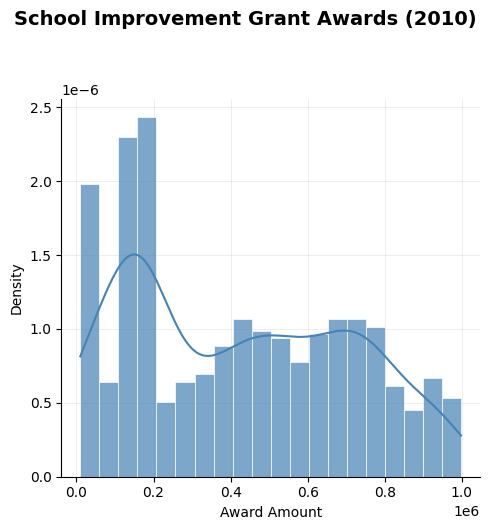

In [19]:
# Create a displot for the data.
g = sns.displot(
    school["Award_Amount"],
    bins=20,  # Explicitly pass in the number 20 for the number of bins in the histogram.
    color="steelblue",
    kde=True,  # Add KDE overlay for smooth distribution
    stat="density",  # Show density instead of count for better interpretation
    alpha=0.7,
    edgecolor="white",
    linewidth=0.5,
)

# Add vertical lines for key statistics
for ax in g.axes.flat:    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
g.figure.suptitle("School Improvement Grant Awards (2010)", 
                  y=1.05, fontsize=14, fontweight='bold')
g.set_axis_labels("Award Amount", "Density")

plt.tight_layout()
plt.show()

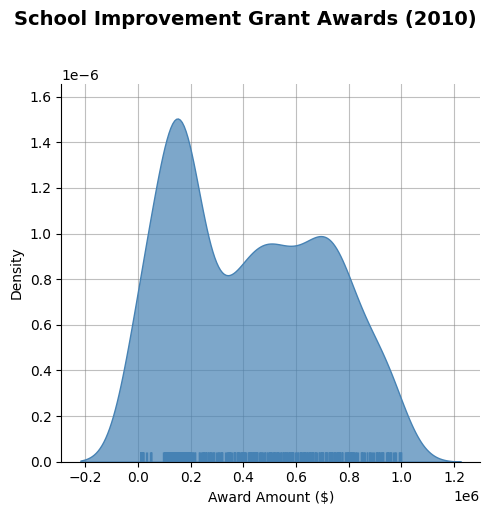

In [23]:
# Configure it to show a shaded kde plot (using the kind and fill parameters).
# Add a rug plot above the x axis (using the rug parameter).

g = sns.displot(data=school["Award_Amount"], 
                kind="kde", 
                rug=True, 
                fill=True,
                color="steelblue",
                alpha=0.7)
g.figure.suptitle("School Improvement Grant Awards (2010)", 
                  fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Award Amount ($)", "Density")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.5, color="grey", zorder=True)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

## Regression Plots in Seaborn

**Regression plots** are essential in data analysis for visualising relationships and trends between two quantitative variables. Seaborn, built on matplotlib, offers powerful, Pythonic tools for regression visualisation: `regplot` (low-level) and `lmplot` (high-level). These functions enable quick, rigorous exploration of linear relationships, complete with confidence intervals, faceting, and advanced aesthetics.

### 1. `regplot`: The Foundation for Regression Visualization

#### What is `regplot`?

- A low-level Seaborn function for generating scatter plots with an optional linear regression fit.
- Accepts both arrays/Series and DataFrame columns.
- Provides fine-grained control over plot appearance.

#### Example: Simple Regression Plot

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wines.csv")

fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df,
    x="alcohol",
    y="pH",
    ax=ax,
    color="mediumblue",
    scatter_kws={"alpha": 0.7, "s": 45, "edgecolor": "k"},
    line_kws={"linewidth": 2, "color": "orangered"},
    ci=95,                  # Confidence interval (default is 95%)
    marker="o",
)
ax.set_title("Regression of pH on Alcohol Content")
plt.tight_layout()
plt.show()
```

**Key parameters:**
- `scatter_kws`: dictionary of matplotlib kwargs for scatter points.
- `line_kws`: dictionary for regression line styling.
- `ci`: width of the confidence interval around the regression line.
- Always use the OOP (`ax=`) interface for more control and composability.


### 2. `lmplot`: High-Level, Faceted Regression Analysis

#### What is `lmplot`?

- A figure-level, high-level interface to regression plotting.
- Built on top of `regplot`.
- Enables faceting (splitting plots by categories), hue, and more.
- Returns a `FacetGrid` object, facilitating multi-panel (faceted) visualisation.

#### Example: Simple Regression with `lmplot`

```python
import seaborn as sns
import pandas as pd

df = pd.read_csv("wines.csv")

g = sns.lmplot(
    data=df,
    x="alcohol",
    y="quality",
    height=5,
    aspect=1.4,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "crimson"},
    ci=95
)
g.set_axis_labels("Alcohol (%)", "Quality")
g.fig.suptitle("Regression of Quality on Alcohol Content", y=1.02)
plt.tight_layout()
plt.show()
```
### 3. Faceting: Grouped Regression Analysis

#### Faceting by Color (hue)

Plot regression lines for subgroups, distinguished by color.

```python
g = sns.lmplot(
    data=df,
    x="quality",
    y="alcohol",
    hue="category_variable",  # Replace with your categorical column
    height=5,
    aspect=1.3,
    scatter_kws={"alpha": 0.6}
)
g.set_axis_labels("Quality", "Alcohol (%)")
g.fig.suptitle("Grouped Regression by Category (hue)", y=1.02)
plt.tight_layout()
plt.show()
```

#### Faceting by Columns (col)

Produce side-by-side panels for each group:

```python
g = sns.lmplot(
    data=df,
    x="quality",
    y="alcohol",
    col="category_variable",  # Replace with your categorical column
    col_wrap=3,               # Controls layout if many panels
    height=4,
    aspect=1,
    scatter_kws={"alpha": 0.7}
)
g.set_axis_labels("Quality", "Alcohol (%)")
g.fig.suptitle("Regression Faceted by Category (col)", y=1.05)
plt.tight_layout()
plt.show()
```
### When to Use `regplot` vs. `lmplot`

- **`regplot`**: Use for single, in-depth regression visualisations with fine control over every element (OOP-style).
- **`lmplot`**: Use for multi-panel, faceted regression analysis, rapid group-wise exploration, or publication-ready graphics with minimal code.


### Statistical and Practical Considerations

- Both `regplot` and `lmplot` default to **ordinary least squares (OLS)** linear regression; nonparametric options are available (e.g., lowess).
- Always inspect scatter, fit, and confidence interval. Consider outliers, nonlinearity, and heteroscedasticity.
- Faceting is invaluable for comparing relationships across categories.

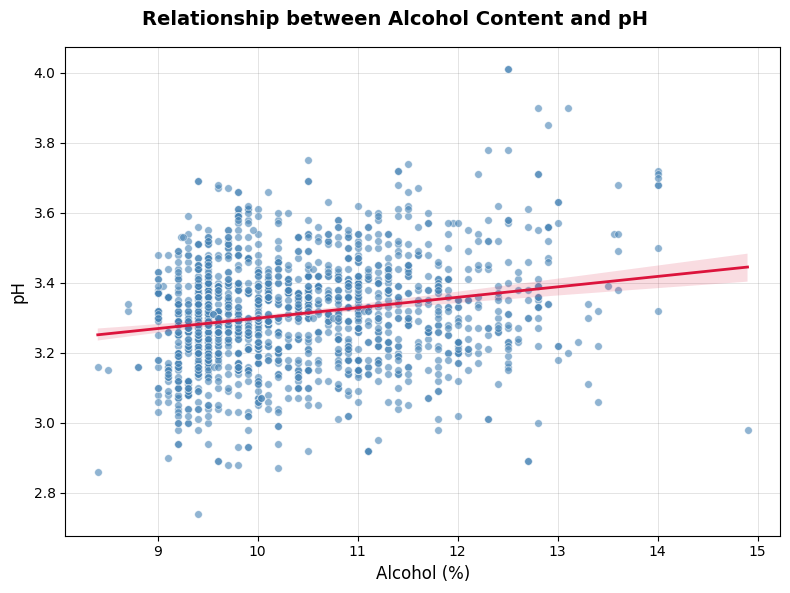

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    data=wine, 
    x="alcohol", 
    y="pH", 
    ax=ax,
    scatter_kws={"alpha": 0.6, "s": 30, "color": "steelblue", "edgecolor": "white", "linewidths": 0.5},
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95
)

fig.suptitle("Relationship between Alcohol Content and pH", fontsize=14, fontweight='bold')
ax.set_xlabel("Alcohol (%)", fontsize=12)
ax.set_ylabel("pH", fontsize=12)
ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

ax.tick_params(labelsize=10)
    
plt.tight_layout()
plt.show()

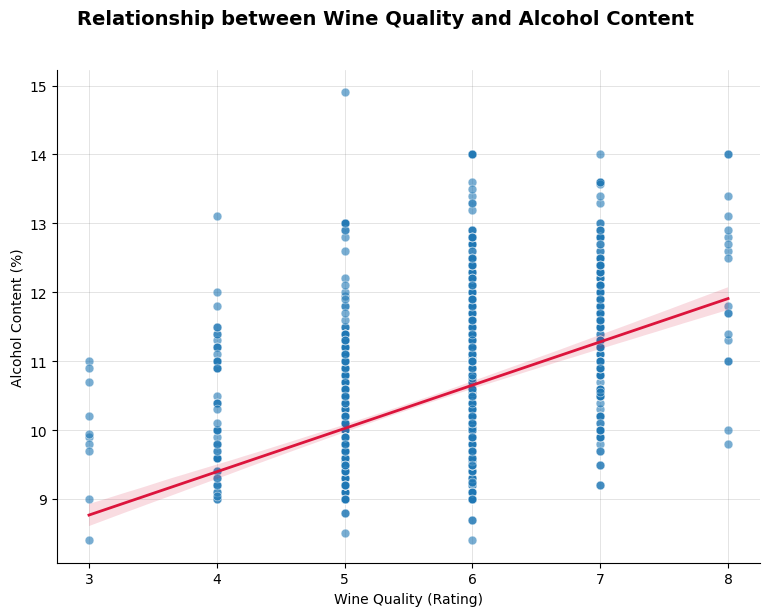

In [ ]:
g = sns.lmplot(
    data=wine, 
    x="quality", 
    y="alcohol", 
    height=6, 
    aspect=1.3,
    scatter_kws={"alpha": 0.6, "s": 40, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95
)

g.figure.suptitle("Relationship between Wine Quality and Alcohol Content", 
                  fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Wine Quality (Rating)", "Alcohol Content (%)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="grey", linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)
    
plt.tight_layout()
plt.show()

FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

In [33]:
insurance = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/1a8176dc594fc0a13a9f1a7b207d30ed312f2e4a/insurance_premiums.csv")
insurance.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


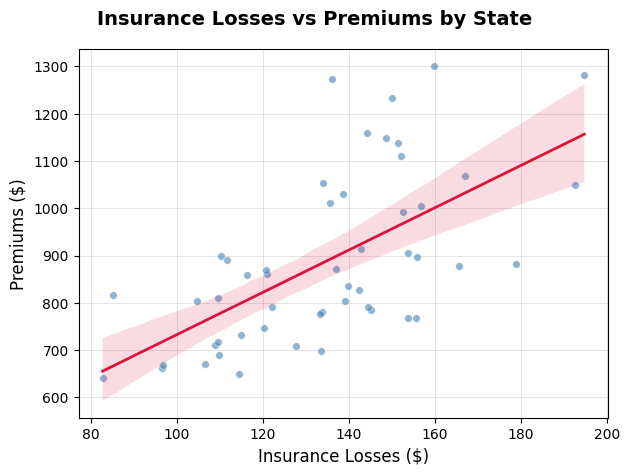

In [35]:
# Create a regression plot using regplot() with "insurance_losses" on the x axis and "premiums" on the y axis.
fig, ax = plt.subplots()

sns.regplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    ax=ax,
    scatter_kws={
        "alpha": 0.6,
        "s": 30,
        "color": "steelblue",
        "edgecolor": "white",
        "linewidths": 0.5,
    },
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95,
)

fig.suptitle("Insurance Losses vs Premiums by State", fontsize=14, fontweight='bold')
ax.set_xlabel("Insurance Losses ($)", fontsize=12)
ax.set_ylabel("Premiums ($)", fontsize=12)

ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

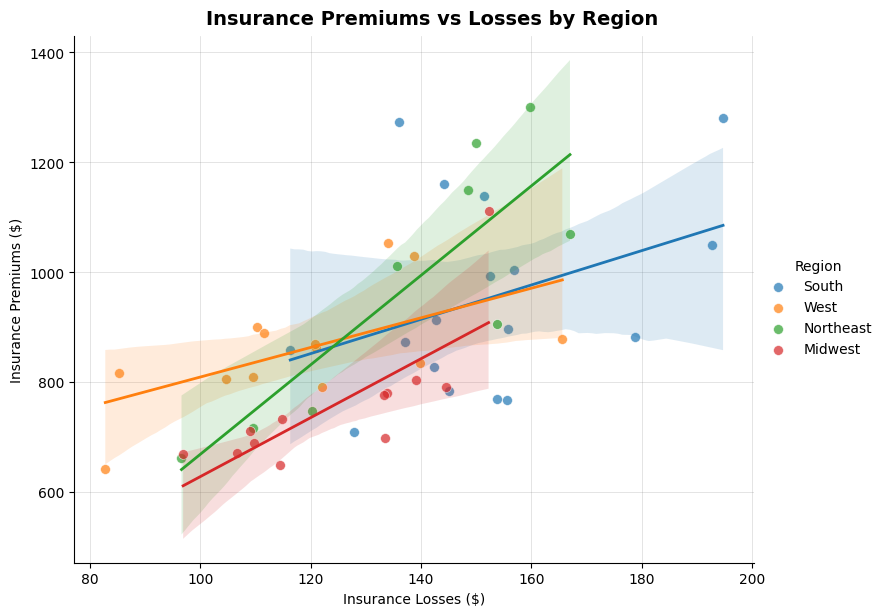

In [45]:
# Create a regression plot of "premiums" versus "insurance_losses" using lmplot().
g = sns.lmplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    hue="Region",
    height=6,
    aspect=1.3,
    scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"linewidth": 2},
    ci=95
)

g.figure.suptitle("Insurance Premiums vs Losses by Region", fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Insurance Losses ($)", "Insurance Premiums ($)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

plt.show()

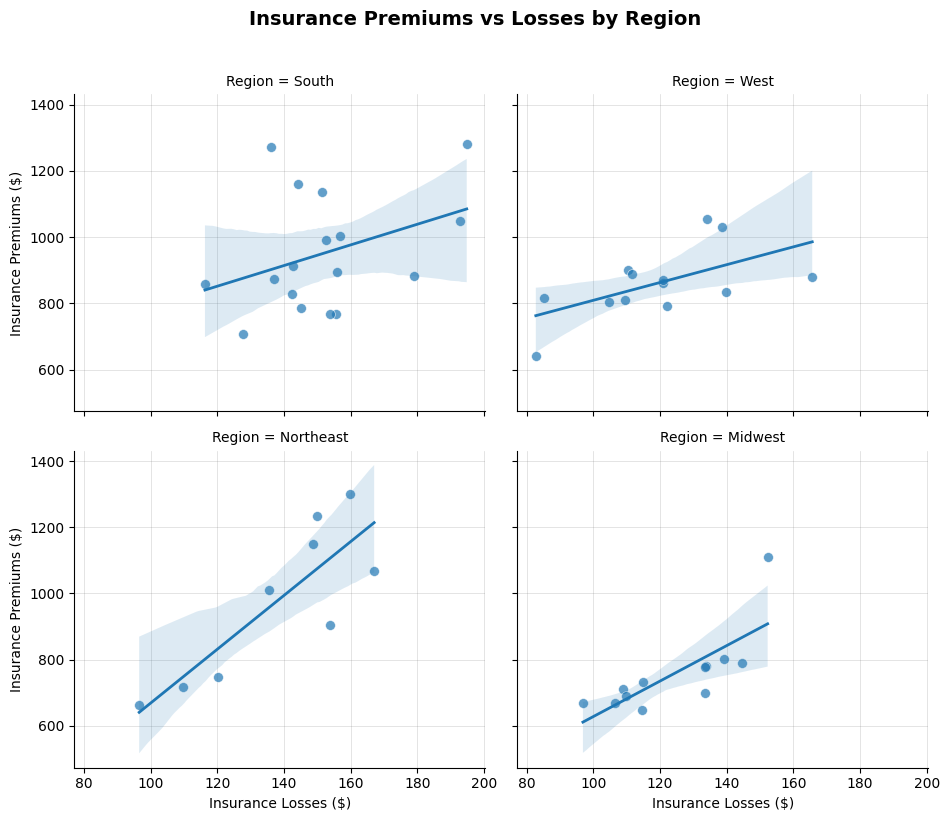

In [ ]:
# Create a regression plot with multiple rows
g = sns.lmplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    col="Region",
    col_wrap=2,  # This creates 2 columns
    height=4,  # Reduced height since we'll have multiple rows
    aspect=1.2,  # Adjust aspect ratio for better fit
    scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"linewidth": 2},
    ci=95,
)

g.figure.suptitle("Insurance Premiums vs Losses by Region", fontsize=14, fontweight="bold", y=1.02)
g.set_axis_labels("Insurance Losses ($)", "Insurance Premiums ($)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="gray", linestyle="-", linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## Using Seaborn Styles for Publication-Quality Plots

The **visual style** of your plots is not just about aesthetics; it enhances interpretability and communicates insights with impact. **Seaborn** is designed with beautiful defaults but also provides powerful ways to fine-tune your visualisations’ style. Mastery of styling is essential for producing publication-quality, Pythonic graphics in exploratory data analysis, reporting, and scientific communication.


### Setting Global Seaborn Styles

Seaborn provides several themes to control the overall appearance of all subsequent plots. These themes apply not just to Seaborn plots but also to matplotlib and pandas figures (when used after setting the style).

#### Setting the Default Style

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data.csv")

# Set Seaborn's default visual settings
sns.set()
df['variable'].plot.hist(bins=20, alpha=0.7)
plt.title("Histogram with Seaborn Default Style")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
```

- `sns.set()` configures a modern, aesthetically pleasing style for all subsequent plots.

### Theme Examples with `sns.set_style()`

Seaborn includes several preset themes:

- `"white"`: Minimalist, removes gridlines.
- `"dark"`: High-contrast, background darkens, gridlines off.
- `"whitegrid"`: Clean, gridlines on (good for statistical plots).
- `"darkgrid"`: Dark background with gridlines.
- `"ticks"`: Adds ticks to axes for precision, similar to academic publications.

**Looping through styles:**

```python
styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']

for style in styles:
    sns.set_style(style)
    # Use displot for a flexible, modern histogram
    g = sns.displot(df['variable'], bins=20, color='dodgerblue', height=4, aspect=1.4)
    g.fig.suptitle(f"Seaborn Style: {style}", y=1.03)
    plt.tight_layout()
    plt.show()
```

**Tips:**
- Try each style with your data—some highlight distributions, others are best for presentations or publications.
- Use `height` and `aspect` for plot sizing.

### Removing Axes with `sns.despine()`

For clarity, especially in minimalist graphics or publications, you may wish to remove the top and right “spines” (axes lines).

```python
sns.set_style('white')
g = sns.displot(df['variable'], bins=20, color='orchid', height=4, aspect=1.4)
sns.despine(left=True, bottom=True)
g.fig.suptitle("Histogram with Minimalist Style and Despined Axes", y=1.03)
plt.tight_layout()
plt.show()
```

- `sns.despine()` is typically called **after** the plot is created.
- `left=True`, `bottom=True` remove the left and bottom spines, respectively.
- You can also pass an `ax` argument to target a specific axes object in the OOP interface.

### Best Practices and Advanced Styling Tips

- Always **set styles at the beginning** of your analysis or script to ensure consistency.
- Combine Seaborn’s themes with custom `matplotlib` tweaks for advanced requirements.
- For academic, print, or black-and-white publication, `"whitegrid"` or `"ticks"` are often preferred.
- Use `palette` options for colour control and accessibility.
- Remember: Seaborn styling will also affect matplotlib and pandas plots if set globally.

In [49]:
rent = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/a1fb97d60bfbcf0661e320a35a4615f4e8661a68/FY18_4050_FMRs.csv")
rent.head()

,fips2010,fmr_0,fmr_1,fmr_2,fmr_3,fmr_4,state,metro_code,areaname,county,cousub,countyname,county_town_name,pop2010,acs_2017_2,state_alpha,fmr_type,metro,fmr_pct_chg,fmr_dollar_chg
0,100199999,588,691,829,1055,1451,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,822,AL,40,1,0.008516,7
1,100399999,729,762,879,1280,1471,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,977,AL,40,1,-0.100307,-98
2,100599999,491,494,657,824,929,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,671,AL,40,0,-0.020864,-14
3,100799999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,866,AL,40,1,0.018476,16
4,100999999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,866,AL,40,1,0.018476,16


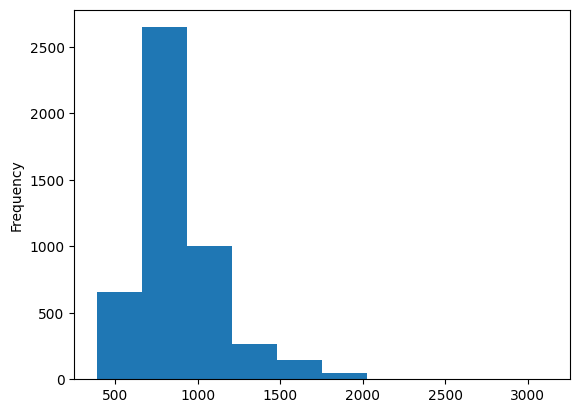

In [50]:
# Plot a pandas histogram without adjusting the style.
rent["fmr_2"].plot.hist()
plt.show()

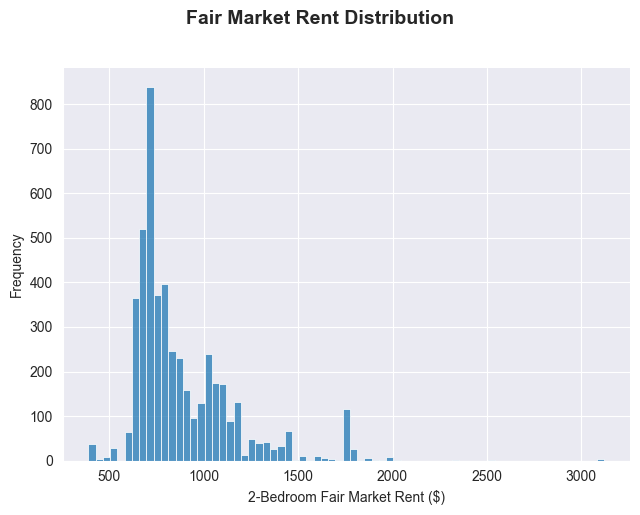

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.displot(data=rent, 
                    x="fmr_2", 
                    height=5, 
                    aspect=1.3)
    
    g.figure.suptitle("Fair Market Rent Distribution", fontsize=14, fontweight='bold', y=1.02)
    g.set_axis_labels("2-Bedroom Fair Market Rent ($)", "Frequency")
    sns.despine()
    
    plt.tight_layout()
    plt.show()

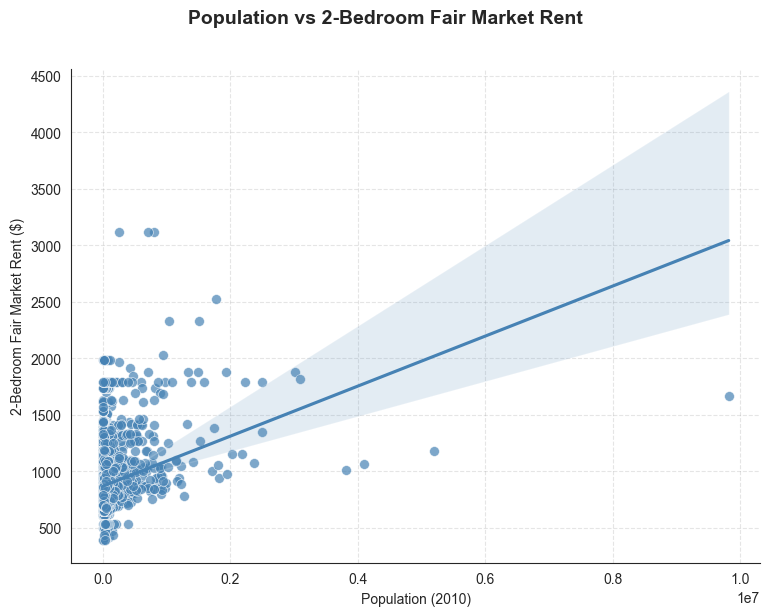

In [71]:
# Set the style to white
with sns.axes_style("white"):
    # Create a regression plot
    g = sns.lmplot(
        data=rent,
        x="pop2010",
        y="fmr_2",
        scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5, "color": "steelblue"},
        line_kws={"color": "steelblue"},
        height=6,
        aspect=1.3,
    )
    g.figure.suptitle("Population vs 2-Bedroom Fair Market Rent", fontsize=14, fontweight="bold", y=1.02)
    g.set_axis_labels("Population (2010)", "2-Bedroom Fair Market Rent ($)")
    
    for ax in g.axes.flat:
        ax.grid(True, alpha=0.2, color="grey", linestyle='--')
        ax.set_axisbelow(True)
    
    sns.despine()

    plt.tight_layout()
    plt.show()